In [47]:

def rgb_to_hsv(r, g, b):
    '''
    Convert RGB to HSV
    returns h,s,v
    '''

    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return h, s, v


    plt.imshow(final_result)
    plt.show
    
 

In [62]:
import cv2
import cv_exp.basic
import cv_exp.basic as cv
import cv_exp.pupil_detection as pupil_detection
import cv_exp.draw as draw
import cv_exp.log as log
import cv_exp.take as take
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
from PIL import Image
import pandas as pd
from scipy.cluster.vq import kmeans, vq



model_face_detection = '/home/roopesh/Desktop/MediaPipe_new_cv_exp/cv-exp-framework-master/data/models/face_detection_front.tflite'
model_face_landmarks ='/home/roopesh/Desktop/MediaPipe_new_cv_exp/cv-exp-framework-master/data/models/face_landmark.tflite'
model_iris_landmarks = '/home/roopesh/Desktop/MediaPipe_new_cv_exp/cv-exp-framework-master/data/models/iris_landmark.tflite'

iris_detector = pupil_detection.IrisDetectorMP(model_face_detection_path=model_face_detection,
                                                   model_face_landmarks_path=model_face_landmarks,
                                                   model_iris_landmarks_path=model_iris_landmarks)



import matplotlib.pyplot as plt
import plotly.express as px

# def Mediapipe_Iris_Color(path):
#     '''
#     This function takes the image in path and Using Mediapipe calculates the Annular Mask of the images,
#     then calculates the HSV color of Annular mask.
#     and returns the dominant Iris colour percentage in a data frame.
#     '''

path='/home/roopesh/Desktop/New_Corpus/Brown/front (3).jpg'
image = cv2.imread(path)

#     plt.imshow(image)
#     plt.show()

# conversion numpy array into rgb image to show


image_bgr_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # converting from BGR to RGB

out = image_bgr_rgb.copy()
out_pupile = image_bgr_rgb.copy()

result = iris_detector.detect(image_bgr_rgb)

if not result is None:

    detected_pupils = result.detected_pupils,
    face_rect_detection = result.face_rect_detection_from_landmarks,
    face_rect_landmarks = result.face_rect_from_landmarks,
    face_landmarks = result.face_landmarks,
    face_rect_detection_from = result.face_rect_from_detection,
    face_landmarks_from_detection = result.face_landmarks_from_detection,
    left_iris_landmarks = result.left_iris_landmarks,
    left_eyelid_landmarks = result.left_eyelid_landmarks,
    right_iris_landmarks = result.right_iris_landmarks,
    right_eyelid_landmarks = result.right_eyelid_landmarks,
    left_iris_segmentation = result.left_iris_segmentation,
    right_iris_segmentation = result.right_iris_segmentation,
    eyes_landmarks = result.eyes_landmarks

    #         out_pupile_ = draw.draw_pupils(out_pupile, result.detected_pupils.left, result.detected_pupils.right, color_center = (255, 255, 255), color_contour = (255, 255, 255))
    #         out_pupile_ = draw.draw_rect(out_pupile_, result.face_rect_detection_from_landmarks, thickness=2, color=(255, 0, 0))
    #         out_pupile_ = draw.draw_list_pointd(out_pupile_, result.left_iris_landmarks,radius=3,color = (255, 255, 255))

    out_= draw.draw_contour(out, result.left_iris_segmentation,  thickness=4,color=(0, 0, 0))

    
    # flattening tuple of tuples of left iris landmarks into a list

    left_iris_tuple_of_tuple_Tolist = ([PointD_elements for PointD in left_iris_landmarks for PointD_elements in PointD])

    # Extraction of Points From LEFT IRIS Landmarks: Left Iris from Coder's Point of view

    left_iris_points = [(pointD.x, pointD.y) for pointD in left_iris_tuple_of_tuple_Tolist]

    center_point_LeftIris=(np.round(left_iris_points[0]))
    for left_x,left_y in [center_point_LeftIris]:
         lx, ly = left_x, left_y

    left_point_LeftIris=(np.round(left_iris_points[1]))
    for leftIris_left_x,LeftIris_left_y in [left_point_LeftIris]:
        LIL_x, LIL_y = leftIris_left_x, LeftIris_left_y

    right_point_LeftIris=(np.round(left_iris_points[3]))
    for rightIris_x,rightIris_y in [right_point_LeftIris]:
        RIL_x, RIL_y = rightIris_x, rightIris_y

    Top_point_LeftIris=(np.round(left_iris_points[2]))
    for TopIris_x,TopIris_y in [Top_point_LeftIris]:
        TI_x, TI_y = TopIris_x, TopIris_y

    Bottom_point_LeftIris=(np.round(left_iris_points[4]))
    for BottomIris_x,BottomIris_y in [Bottom_point_LeftIris]:
        BI_x, BI_y = BottomIris_x, BottomIris_y


    #    Extract Eye Lids 
    eldt_lid_tuple_to_list=[pointe_elements for point in left_eyelid_landmarks for pointe_elements in point]
    lef_eye_lid=[(pointe.x,pointe.y) for pointe in eldt_lid_tuple_to_list]
    #             print(lef_eye_lid)

    point_0= (np.round(lef_eye_lid[0]))
    for p0x,p0y in [point_0]:
        pointx0,pointy0= p0x,p0y

    point_1= (np.round(lef_eye_lid[1]))
    for p1x,p1y in [point_1]:
        pointx1,pointy1= p1x,p1y 

    point_2= (np.round(lef_eye_lid[2]))
    for p2x,p2y in [point_2]:
        pointx2,pointy2= p2x,p2y

    point_3= (np.round(lef_eye_lid[3]))
    for p3x,p3y in [point_3]:
        pointx3,pointy3=  p3x,p3y 

    point_4= (np.round(lef_eye_lid[4]))
    for p4x,p4y in [point_4]:
        pointx4,pointy4= p4x,p4y

    point_5= (np.round(lef_eye_lid[5]))
    for p5x,p5y in [point_5]:
        pointx5,pointy5= p5x,p5y

    point_6= (np.round(lef_eye_lid[6]))
    for p6x,p6y in [point_6]:
        pointx6,pointy6= p6x,p6y

    point_7= (np.round(lef_eye_lid[7]))
    for p7x,p7y in [point_7]:
        pointx7,pointy7= p7x,p7y

    point_8= (np.round(lef_eye_lid[8]))
    for p8x,p8y in [point_8]:
        pointx8,pointy8= p8x,p8y

    point_9= (np.round(lef_eye_lid[9]))
    for p9x,p9y in [point_9]:
        pointx9,pointy9= p9x,p9y

    point_10= (np.round(lef_eye_lid[10]))
    for p10x,p10y in [point_10]:
        pointx10,pointy10= p10x,p10y

    point_11= (np.round(lef_eye_lid[11]))
    for p11x,p11y in [point_11]:
        pointx11,pointy11= p11x,p11y

    point_12= (np.round(lef_eye_lid[12]))
    for p12x,p12y in [point_12]:
        pointx12,pointy12= p12x,p12y

    point_13= (np.round(lef_eye_lid[13]))
    for p13x,p13y in [point_13]:
        pointx13,pointy13= p13x,p13y

    point_14= (np.round(lef_eye_lid[14]))
    for p14x,p14y in [point_14]:
        pointx14,pointy14= p14x,p14y


    # Distance Formula to calculate the distance between center to left_Iris_ points to get radius of iris
    distance_left_iris_center = np.sqrt((lx - LIL_x) ** 2 + (ly - LIL_y) ** 2)
    
    # distance between point 4 and center of iris
    distance_point_4_iris_center = np.sqrt((lx - p4x) ** 2 + (ly - p4y) ** 2)

#  First Circular mask to take inner pupil area alone

    mask = np.zeros(out_.shape, dtype=np.uint8)     # Result from Mediapipe added here for second mask.
    center= (int(left_x),int(left_y))
    radius = (int((distance_left_iris_center)*0.20))      
    left_mask = cv2.circle(mask, center, radius, (255, 255, 255), -1 )
    result = cv2.bitwise_and(out_, left_mask)  
    result[mask==0] = 255                                 # adding background Color- white
   

    # Cropping the inner pupil area from the second circular masked image (size should be same as the first masked and cropped result )

    x= int(pointx12)       # x-axis --Landmarks points from 
    y= int(pointy11)     # y-axis --Landmarks points from 
    h= int(distance_point_4_iris_center*1.5)   # height --
    w=int(radius*2.35)   # width  --Radius of iris times 2.35 for adjustment
    crop = result[y:y+h, x:x+w]
    
    
# second Circular mask to take inner pupil area alone
    
    mask1 = np.zeros(out_.shape, dtype=np.uint8)     # Result from Mediapipe added here for second mask.
    center1= (int(left_x),int(left_y))
    radius1 = (int((radius)* 0.30))     # to scrap pupil area and other reflection area
    left_mask1 = cv2.circle(mask1, center1, radius1, (255, 255, 255), -1 )
    result1 = cv2.bitwise_and(out_, left_mask1-255)  # subtracting white region over masked area
    result1[mask1==0] = 255                                 # adding background Color- white

# Cropping the inner pupil area from the second circular masked image (size should be same as the first masked and cropped result )

    x1= int(pointx12)        # x-axis --Landmarks points from top-
    y1= int(pointy11)         # y-axis --Landmarks points from top_ 
    h1= int(distance_point_4_iris_center*1.5)   # height -
    w1=int(radius*2.35)    # width  --Radius of iris times 2.35 for adjustment
    crop1 = result1[y1:y1+h1, x1:x1+w1]
    
# Bitwise and operation to omit the inner pupil alone and take the rest of the iris area
    
    adding_both_cropped_image = cv2.bitwise_and(crop, crop1)
    

# Removing NOISE from the Adding_both_cropped_image (<=10,  >=240) in all channel

    final_result = np.array(adding_both_cropped_image)
    mask = np.all(final_result <= [10, 10, 10], axis=2)
    final_result[mask] = [0, 0, 0]
    mask = np.all(final_result >= [240, 240, 240], axis=2)
    final_result[mask] = [0, 0, 0]
    annular_result = final_result                   # the final result of the iris area from mediapipe

    pil_image = Image.fromarray(annular_result)     # input from the annular_result read as array
    imarray = np.array(pil_image.getdata())
    df = pd.DataFrame(imarray, columns=['RED', 'GREEN', 'BLUE'])
    df = pd.DataFrame(df[(df['RED'] >= 50) | (df['GREEN'] >= 50) | (df['BLUE'] >= 50)])  # For value greater than 50

    # K-Means Clustering using Scipy

    cluster_size = 3
    cluster_centers, _ = kmeans(df.values.astype(float), cluster_size)
    index, _ = vq(df.values.astype(float), cluster_centers)
    count = np.bincount(index)
    sum = np.sum(count)
    i, Blue, Green, Brown,Other = 0, 0, 0, 0, 0
    for row in cluster_centers:
        r = row[0]
        g = row[1]
        b = row[2]
        h, s, v = rgb_to_hsv(r, g, b)   # calling the function to convert RGB to HSV
        percent = count[i]*100/sum
        if h >= 170 and h < 270:
            Blue += percent
        elif h >= 60 and h < 170:
            Green += percent
        elif h >= 300 or h < 40:
            Brown += percent
        else:
            Other += percent
        i+=1

# Results of Dominant Color Detection in dataframe

    data = [[path, int(Blue), int(Green), int(Brown), int(Other)]]
    dominantColour_ = pd.DataFrame(data, columns=['File_name :', 'Blue % :', 'Green % :', 'Brown % :','Other % :']).T
    print(dominantColour_)
#     return(dominantColour_)
else: print("No face detected :", file)

 # **************************  END of Dominant Colour Detection **************************


<function matplotlib.pyplot.show(close=None, block=None)>

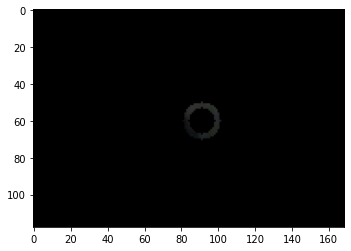

In [63]:
plt.imshow(final_result)
plt.show

In [26]:
df

,RED,GREEN,BLUE
128,51,35,20
129,55,37,25
130,52,36,21
298,54,37,27
299,51,37,24
...,...,...,...
19899,53,48,42
19900,61,53,42
19901,64,55,40
19902,67,58,43


In [41]:
#  First Circular mask to take inner pupil area alone

mask = np.zeros(out_.shape, dtype=np.uint8)     # Result from Mediapipe added here for second mask.
center= (int(left_x),int(left_y))
radius = (int((distance_left_iris_center)*0.20))      
left_mask = cv2.circle(mask, center, radius, (255, 255, 255), -1 )
result = cv2.bitwise_and(out_, left_mask)  
result[mask==0] = 255                                 # adding background Color- white

# Cropping the inner pupil area from the second circular masked image (size should be same as the first masked and cropped result )

x= int(pointx12)       # x-axis --Landmarks points from 
y= int(pointy11)     # y-axis --Landmarks points from 
h= int(distance_point_4_iris_center*1.5)   # height --
w=int(radius*2.35)   # width  --Radius of iris times 2.35 for adjustment
crop = result[y:y+h, x:x+w]

    


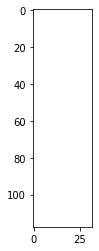

In [44]:
plt.imshow(crop)
plt.show()